# Extraterrestrial life...

Na een lange reis, stort het ruimteschip van spaceman Spiff neer op een verre planeet. Alles lijkt rustig, maar Spiff ontdekt dat er levende wezens op deze planeet rondlopen. Als goed onderzoeker, begint hij onmiddellijk data te verzamelen over deze wezens. Met zijn "Mertilizer" kan hij de wezens vangen. Per wezen schrijft hij het volgende op:
* het aantal poten dat ze hebben,
* het aantal ogen die ze hebben,
* hun lengte,
* hun breedte,
* hun hoogte,
* de aanwezigheid van een staart,
* hun kleur,
* het al dan niet aanwezig zijn van vleugels

Je vindt deze data in het bestand: "spiffs metingen.csv".

1. Lees het bestand in

In [127]:
import pandas as pd
import numpy as np
import sns as sns

spiffsMetingen = pd.read_csv("data/spiffs metingen.csv")
display(spiffsMetingen)

,poten,ogen,lengte,breedte,hoogte,staart,kleur,vleugels
0,6,2,1.6,0.8,0.7,False,1,False
1,6,2,2.4,0.7,0.8,False,2,False
2,6,2,2.1,0.6,0.9,False,1,False
3,6,2,2.2,0.8,0.7,False,2,False
4,6,2,1.7,0.7,0.7,False,1,False
...,...,...,...,...,...,...,...,...
1775,10,1,187.4,105.0,32.5,True,1,False
1776,4,2,58.2,63.1,199.2,False,1,False
1777,10,1,191.0,101.7,25.4,False,2,False
1778,6,6,2.3,0.9,0.7,False,2,True



2. Maak een dendrogram van deze data. Je merkt dat het dendrogram teveel takken heeft. Gebruik de truncate_mode optie 'level' en parameter p in dendrogram om aantal niveaus te beperken. Zoek op in de scipy documentatie (google) hoe je dit kan doen.

C:\Users\elias\AppData\Local\Temp\ipykernel_22152\3443943189.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  distances_single = linkage(afstanden_euclidische, method='single')


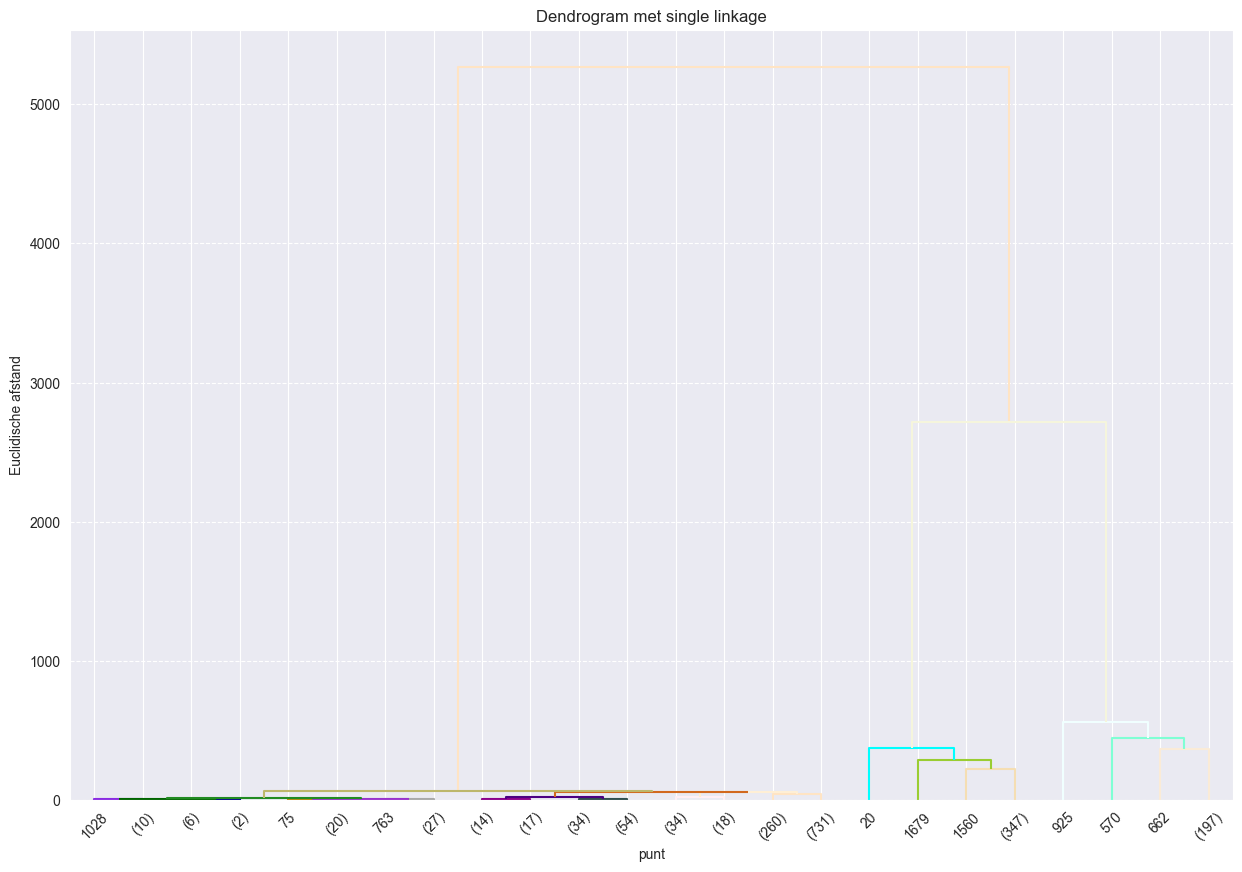

In [128]:
from matplotlib import pyplot as plt
import matplotlib
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import cdist

# Copy dataframe and drop columns that are not numeric
tempDF = spiffsMetingen.copy()
tempDF.drop(['staart', 'vleugels'], axis=1, inplace=True)

afstanden_euclidische = pd.DataFrame(cdist(tempDF, tempDF), columns=tempDF.index, index=tempDF.index) # Afstanden Euclidische

colors = list(matplotlib.colors.cnames.keys())[0:200:1] * 100 # Kleuren voor de dendrogram (100 keer herhalen) en 200 kleuren gebruiken (anders krijg je een foutmelding)

fig, ax = plt.subplots(figsize=(15, 10))
distances_single = linkage(afstanden_euclidische, method='single')
_ = ax.set_title('Dendrogram met single linkage')
_ = ax.set_xlabel('punt')
_ = ax.set_ylabel('Euclidische afstand')
_ = ax.grid(linestyle='--', axis='y')

# Aanpassing: Gebruik truncate_mode en p om het aantal niveaus te beperken
dgram = dendrogram(distances_single, labels=afstanden_euclidische.index.values, link_color_func=lambda x: colors[x], truncate_mode='level', p=4, ax=ax)

plt.show()

3. Bepaal de hoogte waarbij er 3 clusters zijn

In [129]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, metric='manhattan', linkage='single')
cluster.fit(spiffsMetingen)
spiffsMetingen['cluster_with_3'] = cluster.labels_
display(spiffsMetingen)

,poten,ogen,lengte,breedte,hoogte,staart,kleur,vleugels,cluster_with_3
0,6,2,1.6,0.8,0.7,False,1,False,1
1,6,2,2.4,0.7,0.8,False,2,False,1
2,6,2,2.1,0.6,0.9,False,1,False,1
3,6,2,2.2,0.8,0.7,False,2,False,1
4,6,2,1.7,0.7,0.7,False,1,False,1
...,...,...,...,...,...,...,...,...,...
1775,10,1,187.4,105.0,32.5,True,1,False,2
1776,4,2,58.2,63.1,199.2,False,1,False,0
1777,10,1,191.0,101.7,25.4,False,2,False,2
1778,6,6,2.3,0.9,0.7,False,2,True,1




4. Maak een scatterplot waarbij je het aantal ogen in de X-as zet en de lengte in de Y-as. Gebruik de cluster als kleur. Wat zie je?

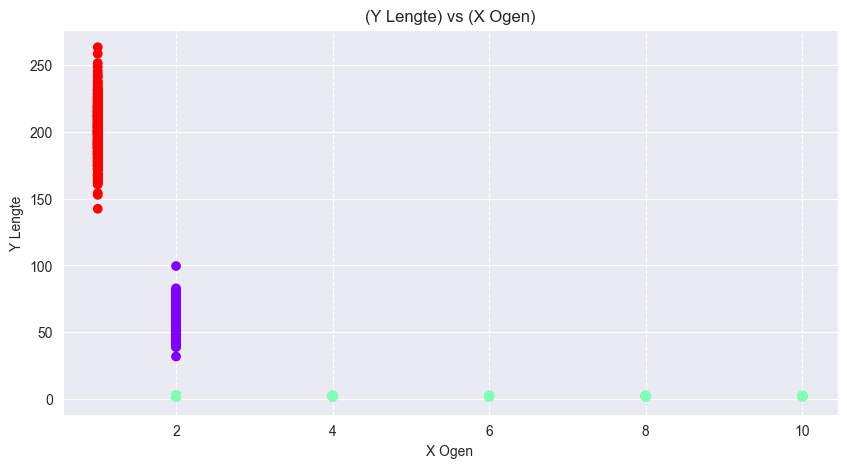

In [130]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(10, 5))
ax.scatter(spiffsMetingen.ogen, spiffsMetingen.lengte, c=spiffsMetingen.cluster_with_3, cmap='rainbow') # "c=simpsons.cluster_with_2, cmap='rainbow'" voor kleuren
ax.set_title('(Y Lengte) vs (X Ogen)')
ax.set_xlabel('X Ogen')
ax.set_ylabel('Y Lengte')
_=ax.grid(linestyle='--', axis='x')

5. Doe dit ook voor 4 clusters. Welke cluster werd er opgesplitst?

,poten,ogen,lengte,breedte,hoogte,staart,kleur,vleugels,cluster_with_3,cluster_with_4
0,6,2,1.6,0.8,0.7,False,1,False,1,1
1,6,2,2.4,0.7,0.8,False,2,False,1,1
2,6,2,2.1,0.6,0.9,False,1,False,1,1
3,6,2,2.2,0.8,0.7,False,2,False,1,1
4,6,2,1.7,0.7,0.7,False,1,False,1,1
...,...,...,...,...,...,...,...,...,...,...
1775,10,1,187.4,105.0,32.5,True,1,False,2,2
1776,4,2,58.2,63.1,199.2,False,1,False,0,0
1777,10,1,191.0,101.7,25.4,False,2,False,2,2
1778,6,6,2.3,0.9,0.7,False,2,True,1,1


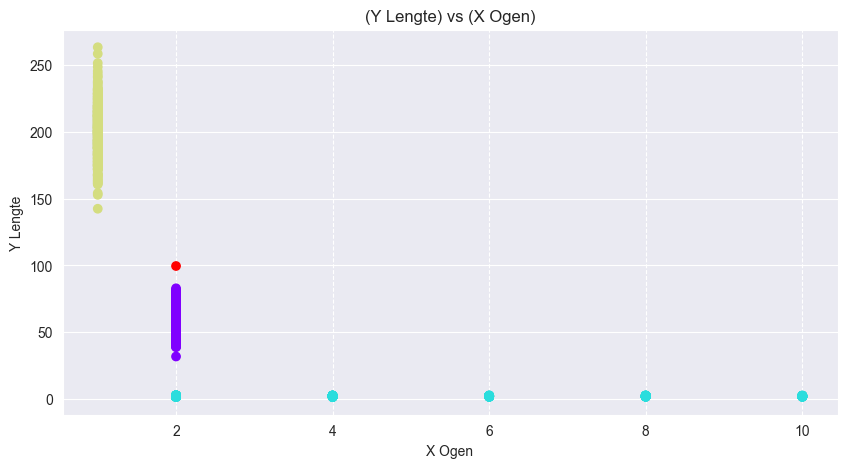

In [131]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, metric='manhattan', linkage='single')
cluster.fit(spiffsMetingen)
spiffsMetingen['cluster_with_4'] = cluster.labels_
display(spiffsMetingen)

import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(10, 5))
ax.scatter(spiffsMetingen.ogen, spiffsMetingen.lengte, c=spiffsMetingen.cluster_with_4, cmap='rainbow') # "c=simpsons.cluster_with_2, cmap='rainbow'" voor kleuren
ax.set_title('(Y Lengte) vs (X Ogen)')
ax.set_xlabel('X Ogen')
ax.set_ylabel('Y Lengte')
_=ax.grid(linestyle='--', axis='x')

# De cluster met 2 ogen werd opgesplitst (cluster 1)

6. Zoek met k-means 3 clusters. Bekijk de centroids. Welke soorten wezens zijn er op deze planeet?

In [132]:
# K-means algoritme
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, n_init='auto', max_iter=100)
model.fit(spiffsMetingen)

centroids = model.cluster_centers_ # Centroids van de clusters (3 clusters) 0, 1 en 2

centroids_df = pd.DataFrame(centroids, columns=spiffsMetingen.columns)
centroids_df.drop(['cluster_with_3', 'cluster_with_4', 'staart', 'vleugels'], axis=1, inplace=True)
display(centroids_df)

,poten,ogen,lengte,breedte,hoogte,kleur
0,6.621138,3.614634,2.00187,0.748455,0.749268,1.483740
1,9.942857,1.000000,201.40600,100.916571,30.190286,1.522857
2,4.000000,2.000000,60.22700,70.457500,177.895000,1.495000


7. Voeg een kolom toe aan de data met de clusternummer. Maak nu een beslissingsboom die bepaalt tot welke categorie een ruimtewezen behoort.

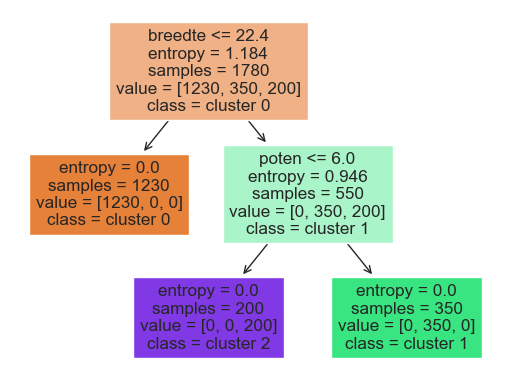

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(spiffsMetingen.drop(['cluster_with_3', 'cluster_with_4'], axis=1), model.labels_)

_ = tree.plot_tree(classifier, feature_names=['poten', 'ogen', 'lengte', 'breedte', 'hoogte', 'staart', 'kleur', 'vleugels'],
                   class_names=['cluster {}'.format(i) for i in np.unique(model.labels_)], filled=True)

# feature_names = ['poten', 'ogen', 'lengte', 'breedte', 'hoogte', 'staart', 'kleur', 'vleugels'] # Dit is de volgorde van de kolommen in de dataset (zie hierboven)